<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/probability_sekhar_hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import random

In [14]:
wins = 0
def sekhar_hall_simulation(num_trials, switch_strategy):
  wins = 0
  for _ in range(num_trials):
          doors = [0, 0, 0]  # 0 represents a goat, 1 represents the car
          car_door = random.randint(0, 2)
          doors[car_door] = 1
          first_choice = random.randint(0, 2)
          openable_doors = [i for i in range(3) if i != first_choice and doors[i] == 0]
          revealed_door = random.choice(openable_doors)
          if switch_strategy:
              # Switch to the other unchosen, unrevealed door
              final_choice = [i for i in range(3) if i != first_choice and i != revealed_door][0]
          else:
              final_choice = first_choice

          if doors[final_choice] == 1:
              wins += 1

  return (wins / num_trials) * 100
num_simulations = 10000000

# Simulate without switching
win_percentage_stick = sekhar_hall_simulation(num_simulations, False)
print(f"Winning percentage when sticking: {win_percentage_stick:.2f}%")

# Simulate with switching
win_percentage_switch = sekhar_hall_simulation(num_simulations, True)
print(f"Winning percentage when switching: {win_percentage_switch:.2f}%")

Winning percentage when sticking: 33.36%
Winning percentage when switching: 66.67%


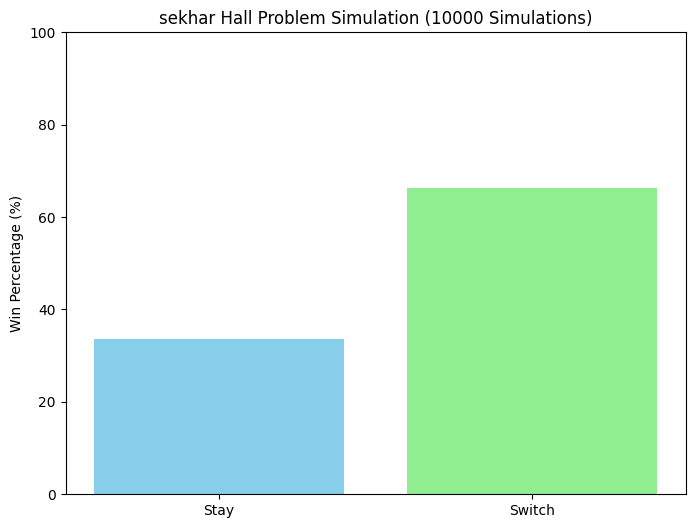

Win percentage if staying: 33.69%
Win percentage if switching: 66.39%


In [25]:
import random
import matplotlib.pyplot as plt

def simulate_sekhar_hall(num_simulations, switch_strategy):
    wins = 0
    for _ in range(num_simulations):
        doors = [0, 0, 0]  # 0 represents a goat, 1 represents the car
        car_door = random.randint(0, 2)
        doors[car_door] = 1

        # Player's initial choice
        player_choice = random.randint(0, 2)

        # Monty reveals a goat door
        # Find a door sekhar can open (not the car, not the player's choice)
        possible_sekhar_choices = [i for i in range(3) if i != car_door and i != player_choice]
        sekhar_revealed_door = random.choice(possible_sekhar_choices)

        # Determine final choice based on strategy
        final_choice = player_choice
        if switch_strategy:
            # Switch to the other unrevealed door
            final_choice = next(i for i in range(3) if i != player_choice and i != sekhar_revealed_door)

        if doors[final_choice] == 1:
            wins += 1

    return (wins / num_simulations) * 100

# Simulation parameters
num_simulations = 10000

# Run simulations
win_percentage_stay = simulate_sekhar_hall(num_simulations, False)
win_percentage_switch = simulate_sekhar_hall(num_simulations, True)

# Plotting the results
strategies = ['Stay', 'Switch']
win_percentages = [win_percentage_stay, win_percentage_switch]

plt.figure(figsize=(8, 6))
plt.bar(strategies, win_percentages, color=['skyblue', 'lightgreen'])
plt.ylabel('Win Percentage (%)')
plt.title(f'sekhar Hall Problem Simulation ({num_simulations} Simulations)')
plt.ylim(0, 100)
plt.show()

print(f"Win percentage if staying: {win_percentage_stay:.2f}%")
print(f"Win percentage if switching: {win_percentage_switch:.2f}%")